## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [12] : [Reinforcement Learning] </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [39]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Fernando Khorasani"
myNIM = "43088"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Fernando Khorasani
NIM: 		43088
Start: 		2022-11-29 17:19:54.872231
Device ID: 	5e431887-6fcf-11ed-aa0e-782b46918710



---

### Dataset yang dipakai:

1. [Nama dataset1] – sumber : [cantumkan link dataset]
2. [Nama dataset2] – sumber : [cantumkan link dataset]

### Hasil kerja

In [40]:
pip install gym==0.21.0

In [1]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys


In [2]:
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting

matplotlib.style.use('ggplot')

In [3]:
#Buat enviroment untuk gym
env = WindyGridworldEnv()

In [4]:
#Make the Epsilon-greedy policy
def createEpsilonGreedy(Q, epsilon, num_actions):
    def policyFunction(state):
        Action_probabilities = np.ones(num_actions, dtype=float) * epsilon / num_actions
        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities
    return policyFunction

In [5]:
#Build Q-learning model
def qLearning(env, num_episodes, discount_factor=1.0, alpha=0.6, epsilon=0.1):
    #Action value function
    #A nested dictionary that maps
    # state -> action -> action-value
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Keeps tracks of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))
    
    # The policy we're following
    policy = createEpsilonGreedy(Q, epsilon, env.action_space.n)

    # For every episode
    for ith_episode in range(num_episodes):

        #reset the environment and pick the first action
        state = env.reset()

        for t in itertools.count():

            #get ptobabilities of all actions from current state\
            action_probabilities = policy(state)
            #choose action according to the probability sictribution
            action = np.random.choice(np.arange(len(action_probabilities)), p=action_probabilities)
            #take action and get reward, transit to next state
            next_state, reward, done, _ = env.step(action)
            #update statistics
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t

            #TD Update
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta

            if done:
                break

            state = next_state
    return Q,stats

In [6]:
#train model
Q, stats = qLearning(env, 1000)

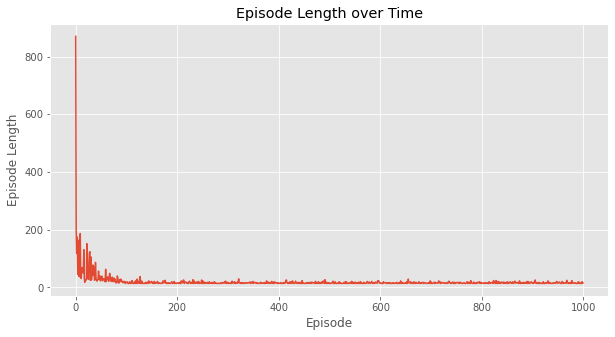

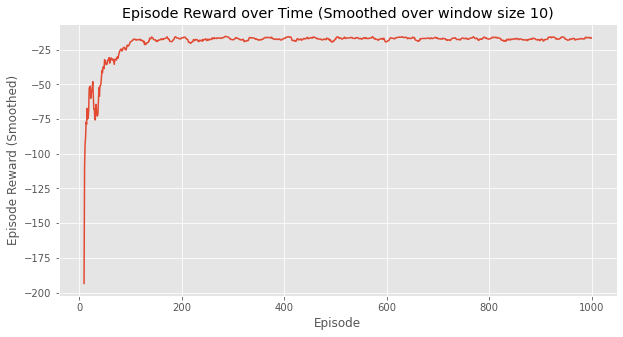

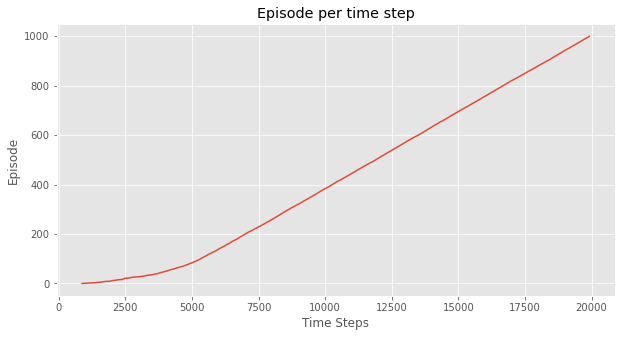

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [7]:
#plot important statistics
plotting.plot_episode_stats(stats)

In [8]:
import numpy as np
import pylab as pl
import networkx as nx

In [9]:
#Define and visualizing the graph
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
        (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
        (8, 9), (7, 8), (1, 7), (3, 9)]

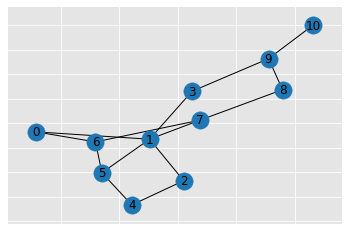

In [10]:
goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()

In [11]:
#Define reward system for the bot
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

for point in edges:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0

    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]] = 0

M[goal, goal] = 100
print(M)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


In [12]:
#Define some utility functions to be used in the training
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

gamma = 0.75
initial_state = 1

In [13]:
#define the available action for given state
def available_actions(state):
    current_state_row = M[state,]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action
available_action = available_actions(initial_state)

In [14]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

action = sample_next_action(available_action)

In [15]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = M[current_state, action] + gamma * max_value

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state, action, gamma)

0

In [16]:
#training and evaluating the bot using the Q-Matrix
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)

Most efficient path:
[0, 1, 3, 9, 10]


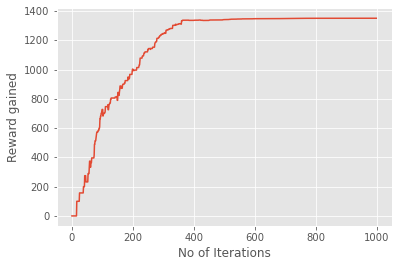

In [17]:
#testing
current_state = 0
steps = [current_state]

while current_state != 10:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

pl.plot(scores)
pl.xlabel("No of Iterations")
pl.ylabel("Reward gained")
pl.show()


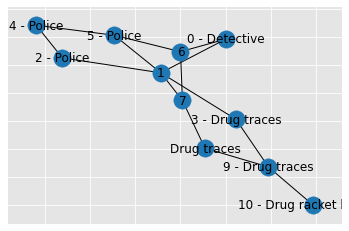

In [18]:
#defining and visualizing the new graph with the environment clues
police = [2,4,5]
drug_traces = [3,8,9]

G = nx.Graph()
G.add_edges_from(edges)
mapping = {0:'0 - Detective', 1:'1', 2:'2 - Police', 3:'3 - Drug traces',
           4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'Drug traces',
           9:'9 - Drug traces', 10:'10 - Drug racket location'}

H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos)
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.show()

In [19]:
#Defining some utility functions for the training process
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
initial_state = 1

In [20]:
def available_actions(state):
    current_state_row = M[state,]
    av_action = np.where(current_state_row >= 0)[1]
    return av_action

In [21]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

In [22]:
def collect_environmental_data(action):
    found = []
    if action in police:
        found.append("p")
    if action in drug_traces:
        found.append("d")
    return found

available_action = available_actions(initial_state)
action = sample_next_action(available_action)

In [23]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]

    Q[current_state, action] = M[current_state, action] + gamma * max_value
    environment = collect_environmental_data(action)
    if 'p' in environment:
        env_police[current_state, action] += 1
    if 'd' in environment:
        env_drugs[current_state, action] += 1
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return(0)
update(initial_state, action, gamma)

0

In [24]:
def available_actions_with_env_help(state):
    current_state_row = M[state,]
    av_action = np.where(current_state_row >= 0)[1]
    #if there are multiple routes, dis-favor anything negative
    env_pos_row = env_matrix_snap[state, av_action]

    if (np.sum(env_pos_row < 0)):
        temp_av_action = av_action[np.array(env_pos_row)[0] >= 0]
        if len(temp_av_action) > 0:
            av_action = temp_av_action

    return av_action

In [25]:
#visualizing the environmental metrices
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)

In [26]:
print('Police Found')
print(env_police)
print('')
print('Drug traces found')
print(env_drugs)

Police Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0. 12.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 48.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 45.  0.  0. 46.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 31.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 32.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Drug traces found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 16.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 65.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 35.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 39.  0.]
 [ 0.  0.  0. 20.  0.  0.  

In [27]:
import gym
env = gym.make("CartPole-v0")
env.render()

C:\ProgramData\Anaconda3\lib\site-packages\pyglet\libs\win32\__init__.py:326: UserWarning: Could not set COM MTA mode. Unexpected behavior may occur.
  warnings.warn("Could not set COM MTA mode. Unexpected behavior may occur.")


In [74]:
env.reset()
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [75]:
# (taxi row, taxi column, passenger index, destination index)
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [76]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [77]:
import numpy as np
import gym

In [81]:
#building the environment
env = gym.make('FrozenLake-v1')

In [82]:
#Define the different parameters
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95

#Initializing the Q-matrix
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [83]:
#Function to choose the next action
def choose_action(state):
    action = 0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

#Function to learn the Q-value
def learn(state, state2, reward, action, action2):
    predict = Q[state, action]
    target = reward + gamma * Q[state2, action2]
    Q[state, action] = Q[state, action] + alpha * (target - predict)

In [84]:
#Training the learning agent
reward = 0;

#starting the SARSA learning
for episode in range(total_episodes):
    t = 0
    state1 = env.reset()

    action1 = choose_action(state1)

    while t < max_steps:
        env.render()

        state2, reward, done, info = env.step(action1)

        action2 = choose_action(state2)

        learn(state1, state2, reward, action1, action2)

        state1 = state2
        action1 = action2

        t += 1

        if done:
            break


SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF

In [85]:
#Evaluating the performance
print ("Performance : ", reward/total_episodes)

#Visualizing the Q-matrix
print(Q)

Performance :  0.0
[[3.95368352e-04 5.84017266e-03 9.55147232e-04 6.14071131e-04]
 [2.08735534e-03 8.40035621e-04 5.49512347e-05 2.81194256e-03]
 [2.36669696e-04 3.61559140e-03 8.83323690e-04 4.76114957e-03]
 [3.57161921e-03 8.18156965e-04 1.25002023e-04 1.34643991e-03]
 [4.25830716e-03 7.13043634e-04 2.86659265e-03 4.84301454e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.31871215e-03 2.87017268e-06 6.78561165e-03 2.36864745e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.91690768e-04 7.79764477e-02 9.33481385e-04 7.72051457e-02]
 [9.53156428e-02 4.26995691e-01 5.85661577e-03 1.06940315e-02]
 [6.29279291e-03 6.96447978e-01 1.11072202e-01 1.80820666e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06273160e-01 7.03282264e-02 6.10503433e-03 1.47912039e-01]
 [1.09437822e-01 8.23786807e-01 1.33636548e-01 7.12159013e-01]
 [0.00000000e+00 0.00000000e+00 0.00

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Reinforcement learning dengan menggunakan Q-values berguna untuk meningkatkan kemampuan belajar dari suatu agent. Metode ini menggunakan Action Values, Rewards dan Episodes, Temporal Difference, dan memilih aksi dengan aturan epsilon-greedy.
    - Bot ini juga bisa dilatih dengan Environment Clues, sehingga ketika di training dengan menggunakan kasus nyata, bot akan terlatih lebih realistis.
    - Dengan menggunakan environment Taxi-v3, pelatihat bot terlihat lebih realistis lagi karena kasusnya kita hampir temui di kehidupan sehari-hari
    - SARSA adalah On Policy dan menggunakan aksi yang telah dilakukan dengan autran yang sedang berlaku untuk memperlajari Q-value. Kemudian percobaan dilakukan dengan encironment FrozenLake-v1, Terlihat agent bisa memilih jalur jalan sesuai dengan keadaan yang ia temui.

In [86]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Fernando Khorasani
NIM: 	43088
Time-stamp:	2022-11-29 21:31:40.954888


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [ ]:
!jupyter nbconvert --to html "./Template Laporan Tugas Mingguan Lab IF540.ipynb" --output-dir="./"

### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#